<a href="https://colab.research.google.com/github/dpasierbiewicz/Cardiotocography_Fetus_Classification/blob/main/CTG_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Import and beggining of cleaning


In [1]:
import pandas as pd

url = 'https://github.com/dpasierbiewicz/Cardiotocography_Fetus_Classification/raw/225121f344eaf9619a05f0ccdd146e4435a4afcc/CTG.xls'

df = pd.read_excel(url, sheet_name='Data')

#column setup
df.columns = df.iloc[0]
df = df[1:]

print(df.head())


0    b     e AC FM UC DL DS DP DR NaN  ...   E  AD  DE  LD  FS SUSP NaN CLASS  \
1  240   357  0  0  0  0  0  0  0 NaN  ...  -1  -1  -1  -1   1   -1 NaN     9   
2    5   632  4  0  4  2  0  0  0 NaN  ...  -1   1  -1  -1  -1   -1 NaN     6   
3  177   779  2  0  5  2  0  0  0 NaN  ...  -1   1  -1  -1  -1   -1 NaN     6   
4  411  1192  2  0  6  2  0  0  0 NaN  ...  -1   1  -1  -1  -1   -1 NaN     6   
5  533  1147  4  0  5  0  0  0  0 NaN  ...  -1  -1  -1  -1  -1   -1 NaN     2   

0 NaN NSP  
1 NaN   2  
2 NaN   1  
3 NaN   1  
4 NaN   1  
5 NaN   1  

[5 rows x 46 columns]


In [2]:
print(df.columns)
len(df.columns)


Index([       'b',        'e',       'AC',       'FM',       'UC',       'DL',
             'DS',       'DP',       'DR',        nan,       'LB',       'AC',
             'FM',       'UC',       'DL',       'DS',       'DP',     'ASTV',
           'MSTV',     'ALTV',     'MLTV',    'Width',      'Min',      'Max',
           'Nmax',   'Nzeros',     'Mode',     'Mean',   'Median', 'Variance',
       'Tendency',        nan,        'A',        'B',        'C',        'D',
              'E',       'AD',       'DE',       'LD',       'FS',     'SUSP',
              nan,    'CLASS',        nan,      'NSP'],
      dtype='object', name=0)


46

In [3]:
#deleting #NaN columns
df = df.dropna(how='all', axis=1)

In [4]:
len(df.columns)

42

In [5]:
#deleting columns with duplicate name
df = df.loc[:, ~df.columns.duplicated(keep='last')]

print(df.columns)
len(df.columns)

Index(['b', 'e', 'DR', 'LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV',
       'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD',
       'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object', name=0)


36

In [6]:
df["DR"].max()
#Because in this feature there is always zero this feature will be deleted along with columns that are not needed for this classification

0

In [7]:
df = df.drop(['b', 'e', 'DR', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS'], axis=1)

In [8]:
print(df.columns)
len(df.columns)

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'NSP'],
      dtype='object', name=0)


22

In [10]:
nan_exists = df.isnull().values.any()
nan_exists

np.True_

In [14]:
print(df.tail)

<bound method NDFrame.tail of 0      LB        AC        FM        UC        DL        DS        DP ASTV  \
1     120         0         0         0         0         0         0   73   
2     132   0.00638         0   0.00638   0.00319         0         0   17   
3     133  0.003322         0  0.008306  0.003322         0         0   16   
4     134  0.002561         0  0.007682  0.002561         0         0   16   
5     132  0.006515         0  0.008143         0         0         0   16   
...   ...       ...       ...       ...       ...       ...       ...  ...   
2125  140  0.000679         0   0.00611         0         0         0   78   
2126  142  0.001616  0.001616  0.008078         0         0         0   74   
2127  NaN       NaN       NaN       NaN       NaN       NaN       NaN  NaN   
2128  NaN       NaN       NaN       NaN         0         0         0  NaN   
2129  NaN       NaN  0.480634  0.014925  0.015385  0.001353  0.005348   87   

0    MSTV ALTV  ...  Min  Max Nma

### Last three rows of this dataset contains min and max values of some attributes so they were removed


In [15]:
df = df.iloc[:-3]
print(df.tail)

<bound method NDFrame.tail of 0      LB        AC        FM        UC        DL DS DP ASTV MSTV ALTV  ...  \
1     120         0         0         0         0  0  0   73  0.5   43  ...   
2     132   0.00638         0   0.00638   0.00319  0  0   17  2.1    0  ...   
3     133  0.003322         0  0.008306  0.003322  0  0   16  2.1    0  ...   
4     134  0.002561         0  0.007682  0.002561  0  0   16  2.4    0  ...   
5     132  0.006515         0  0.008143         0  0  0   16  2.4    0  ...   
...   ...       ...       ...       ...       ... .. ..  ...  ...  ...  ...   
2122  140         0         0  0.007426         0  0  0   79  0.2   25  ...   
2123  140  0.000775         0  0.006971         0  0  0   78  0.4   22  ...   
2124  140   0.00098         0  0.006863         0  0  0   79  0.4   20  ...   
2125  140  0.000679         0   0.00611         0  0  0   78  0.4   27  ...   
2126  142  0.001616  0.001616  0.008078         0  0  0   74  0.4   36  ...   

0     Min  Max Nmax N

##Histograms

### Now I want to know what values attributes have dependent on which class of fetus  they are, so I will make histograms for each attribute and then decide which attributes I will use to train the model

###There are three possible classification of a fetus:
###NSP = 1 - Normal, NSP = 2 - Suspect, NSP = 3 - Pathologic   



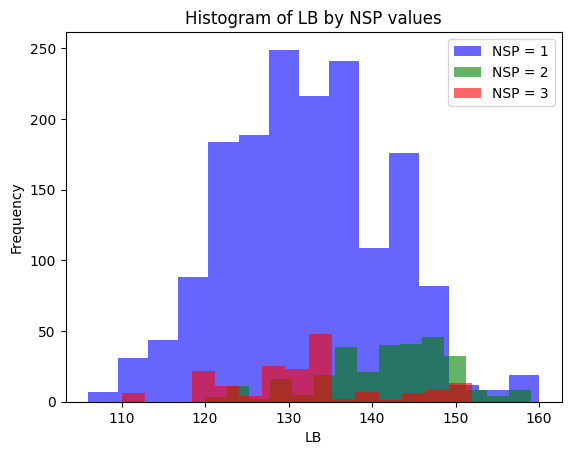

In [22]:
import matplotlib.pyplot as plt

nsp_1 = df[df['NSP'] == 1]['LB']
nsp_2 = df[df['NSP'] == 2]['LB']
nsp_3 = df[df['NSP'] == 3]['LB']

plt.hist(nsp_1, bins=15, alpha=0.6, label='NSP = 1', color='blue')
plt.hist(nsp_2, bins=15, alpha=0.6, label='NSP = 2', color='green')
plt.hist(nsp_3, bins=15, alpha=0.6, label='NSP = 3', color='red')

plt.xlabel('LB')
plt.ylabel('Frequency')
plt.title('Histogram of LB by NSP values')
plt.legend()

plt.show()
